# An analysis of smoking cessation on Twitter

## Introduction

Cigarette smoking causes one-third of all cancer deaths in the United States. It is associated with adverse health outcomes such as second primary cancers among cancer patients and survivors. Smoking also causes non-cancer diseases such as heart disease, chronic obstructive pulmonary disease, and rheumatoid arthritis. Smokers are at an increased risk of developing diseases such as diabetes and have worse symptoms and outcomes associated with health conditions such as asthma and obesity than nonsmokers. Involuntary exposure to smoke is associated with increased risk of tobacco-related diseases such as stroke and lung cancer among nonsmokers. Overall, smoking causes 480000 premature deaths, 50000 secondhand smoking-related deaths, and 12.7 million medical conditions annually. Economic costs because of lost productivity are at $151 billion due to premature death and $5.6 billion due to secondhand smoker. Total annual economic loss for 2009-12 was estimated at $289-332.5 billion.

Twitter is a platform for health-related information. Further, geo-tagging allows researchers to identify geographical regions where smoking cessation tweets are predominant. Research shows that exposure to health information on social media has been associated with health behavior. The primary goal of this project is to examine the volume and content of smoking cessation tweets. 

This project aims to explore the volume of favored and retweeted tweets overall and by state. Further, I aim to conduct textual analysis on most favored and/or retweeted tweets to understand the valence of the tweets. 

## Methods

Using Social Studio Radian 6 application programming interface (API), we identified tweets containing smoking-related keywords from January 1st, 2009 to December 7th, 2015. Examples of keywords used for the search were: cig, smoke, smokes, smoking.

In [ ]:
# creating a conda environment
c:\Users\eltoukhysm>conda create -n pandas python=3.6 pandas
c:\Users\eltoukhysm>activate pandas
c:\Users\eltoukhysm>python

In [1]:
#importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import re, math, collections, itertools

import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import BigramAssocMeasures
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist, ConditionalFreqDist

import collections
from collections import Counter

In [2]:
# reading in csv file of tweets
df = pd.read_csv(r'c:\Users\eltoukhysm\Biof309_Fall2017\Assignments\Final\tweets.csv')

In [3]:
df.head()

,idstr,date,state,text,favorite_count,retweet_count
0,335444384575262720,Fri May 17 17:19:08 +0000 2013,NaN,RT @kroda15: @Simply1Derfulll cigarette smokin...,0,1
1,656610567600345088,Tue Oct 20 23:18:53 +0000 2015,NaN,RT @novacrossQueen: at the age of 29 years old...,0,12
2,223421278256775169,Thu Jul 12 14:19:18 +0000 2012,NaN,"RT @UberFacts: Tobacco smoke contains over 4,0...",0,1498
3,221635492653961217,Sat Jul 07 16:03:13 +0000 2012,NaN,RT @NotCommonFacts: Tobacco is the leading cau...,0,609
4,12915869753,Tue Apr 27 00:53:02 +0000 2010,CA,"study finds smoking, lack of exercise, poor di...",0,0


In [4]:
df.describe()

,idstr,favorite_count,retweet_count
count,5.554790e+05,555479.000000,555479.000000
mean,3.651935e+17,0.349028,237.100007
std,2.067314e+17,12.848667,603.781875
min,1.089198e+09,0.000000,0.000000
25%,2.033430e+17,0.000000,0.000000
50%,3.774682e+17,0.000000,1.000000
75%,5.501210e+17,0.000000,140.000000
max,6.739131e+17,4583.000000,84192.000000


In [5]:
#creating a subset dataframe with only tweets that were favored or retweeted one or more times
df1 = df[np.logical_and(df["favorite_count"]>=1, df["retweet_count"]>=1)]

In [6]:
df1.head()

,idstr,date,state,text,favorite_count,retweet_count
37,596485597335662593,Fri May 08 01:23:43 +0000 2015,NaN,Research found that marijuana does not damage ...,1,1
38,338100487184318465,Sat May 25 01:13:32 +0000 2013,NY,Chewing tobacco is a complete turnoff. Especia...,3,6
112,602184535736918017,Sat May 23 18:49:16 +0000 2015,WA,*smokes joint* dude I swear the only thing to ...,11,2
126,614811102359072768,Sat Jun 27 15:02:44 +0000 2015,NaN,#MSGKickToDrugs bcz chewing tobacco and snuff ...,2,6
129,284773487070031873,Fri Dec 28 21:31:04 +0000 2012,NaN,—Ayer fue mi cumpleaños. —Felhiciidaadezz AmiW...,1,1


In [7]:
df1.describe()

,idstr,favorite_count,retweet_count
count,1.588100e+04,15881.000000,15881.000000
mean,4.800480e+17,10.621057,18.094893
std,1.600289e+17,75.238618,98.562745
min,2.187088e+09,1.000000,1.000000
25%,3.945466e+17,1.000000,1.000000
50%,5.054504e+17,2.000000,2.000000
75%,6.148151e+17,4.000000,6.000000
max,6.736154e+17,4583.000000,3167.000000


### Descriptives

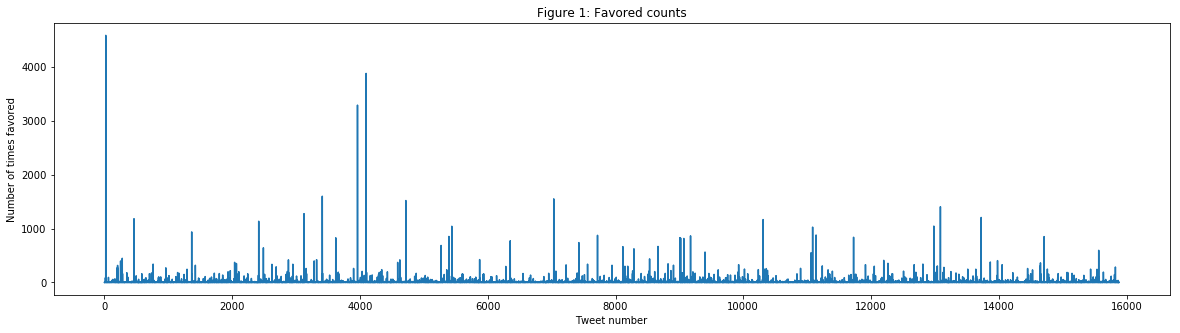

In [8]:
favorites = df1['favorite_count'].values
type(favorites)
plt.figure(figsize=(20,5))
plt.plot(favorites)
plt.xlabel('Tweet number')
plt.ylabel('Number of times favored')
plt.title('Figure 1: Favored counts')
plt.savefig('plot1.png')
plt.show()

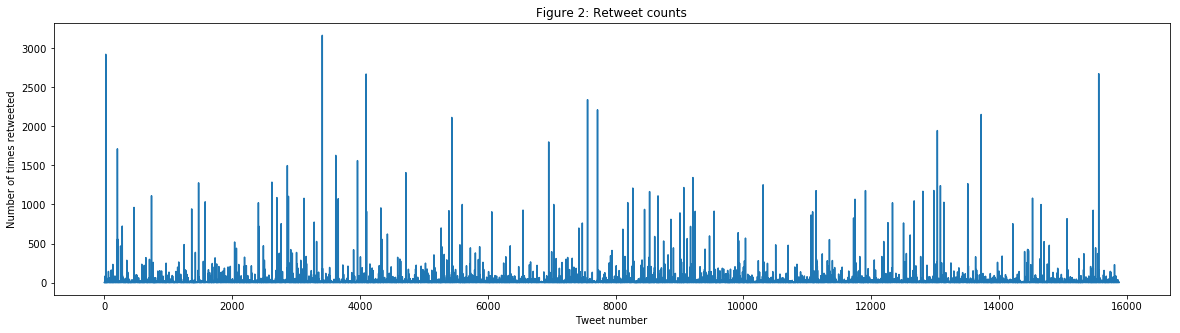

In [9]:
retweets = df1['retweet_count'].values
type(retweets)
plt.figure(figsize=(20,5))
plt.plot(retweets)
plt.xlabel('Tweet number')
plt.ylabel('Number of times retweeted')
plt.title('Figure 2: Retweet counts')
plt.savefig('plot2.png')
plt.show()

In [10]:
# finding correlation between favorites and retweets and plotting them
print(df1[['favorite_count','retweet_count']].corr())

                favorite_count  retweet_count
favorite_count         1.00000        0.73854
retweet_count          0.73854        1.00000


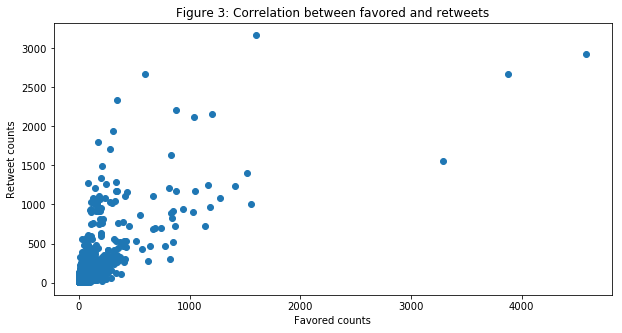

In [11]:
#creating a plot for mean favorites and retweets
plt.figure(figsize=(10,5))
plt.scatter(df1['favorite_count'], df1['retweet_count'])
plt.xlabel('Favored counts')
plt.ylabel('Retweet counts')
plt.title('Figure 3: Correlation between favored and retweets')
plt.savefig('plot3.png')
plt.show()

In [12]:
#creating a function low/high based on mean favorite_count (10.62) and retweet_count(18.09)
f = []
for row in df1['favorite_count']:
    if row < 10.62:
        f.append('low')
    elif row > 10.62:
        f.append('high')

r = []
for row in df1['retweet_count']:
    if row < 18.09:
        r.append('low')
    elif row >18.09:
        r.append('high')

df1 = df1.assign(favorite=f)
df1 = df1.assign(retweet=r)

df1.head()

,idstr,date,state,text,favorite_count,retweet_count,favorite,retweet
37,596485597335662593,Fri May 08 01:23:43 +0000 2015,NaN,Research found that marijuana does not damage ...,1,1,low,low
38,338100487184318465,Sat May 25 01:13:32 +0000 2013,NY,Chewing tobacco is a complete turnoff. Especia...,3,6,low,low
112,602184535736918017,Sat May 23 18:49:16 +0000 2015,WA,*smokes joint* dude I swear the only thing to ...,11,2,high,low
126,614811102359072768,Sat Jun 27 15:02:44 +0000 2015,NaN,#MSGKickToDrugs bcz chewing tobacco and snuff ...,2,6,low,low
129,284773487070031873,Fri Dec 28 21:31:04 +0000 2012,NaN,—Ayer fue mi cumpleaños. —Felhiciidaadezz AmiW...,1,1,low,low


In [13]:
#finding unique entries in State column
df1['state'].unique()

array([nan, 'NY', 'WA', 'VT', 'CA', 'MA', 'DC', 'TN', 'NJ', 'TX', 'GA',
       'OH', 'MD', 'CO', 'OK', 'NC', 'FL', 'WV', 'SC', 'IN', 'VA', 'NV',
       'AL', 'NE', 'PA', 'OR', 'AZ', 'IL', 'ID', 'KY', 'UT', 'MI', 'AR',
       'ME', 'MS', 'KS', 'WI', 'IA', 'AK', 'MO', 'NH', 'MN', 'HI', 'LA',
       'CT', 'ND', 'RI', 'MP', 'DE', 'SD', 'WY', 'AS', 'NM', 'MT'], dtype=object)

In [14]:
#Getting the mean favored and retweeted by State and saving it to a new dataframe
stats = df1.groupby('state').mean()
stats.describe()

,idstr,favorite_count,retweet_count
count,5.300000e+01,53.000000,53.000000
mean,4.761529e+17,4.999287,6.741685
std,3.257178e+16,2.994109,5.467091
min,3.768725e+17,1.375000,1.750000
25%,4.645779e+17,2.914894,3.156250
50%,4.773277e+17,4.135802,4.576271
75%,4.897968e+17,6.248649,9.130952
max,6.221306e+17,14.000000,24.111111


In [15]:
#creating a function with values low, medium, high based on quartiles grouped by states
fs = []
for row in df1['favorite_count']:
    if row <= 2.91:
        fs.append('low')
    elif row > 2.91 and row < 4.13:
        fs.append('medium')
    else:
        fs.append('high')

#creating a function with values low, medium, high based on quartiles grouped by states
rs = []
for row in df1['retweet_count']:
    if row <= 3.15:
        rs.append('low')
    elif row > 3.15 and row < 4.57:
        rs.append('medium')
    else:
        rs.append('high')

df1 = df1.assign(statefavorite=fs)
df1 = df1.assign(stateretweet=rs)

df1.head()

,idstr,date,state,text,favorite_count,retweet_count,favorite,retweet,statefavorite,stateretweet
37,596485597335662593,Fri May 08 01:23:43 +0000 2015,NaN,Research found that marijuana does not damage ...,1,1,low,low,low,low
38,338100487184318465,Sat May 25 01:13:32 +0000 2013,NY,Chewing tobacco is a complete turnoff. Especia...,3,6,low,low,medium,high
112,602184535736918017,Sat May 23 18:49:16 +0000 2015,WA,*smokes joint* dude I swear the only thing to ...,11,2,high,low,high,low
126,614811102359072768,Sat Jun 27 15:02:44 +0000 2015,NaN,#MSGKickToDrugs bcz chewing tobacco and snuff ...,2,6,low,low,low,high
129,284773487070031873,Fri Dec 28 21:31:04 +0000 2012,NaN,—Ayer fue mi cumpleaños. —Felhiciidaadezz AmiW...,1,1,low,low,low,low


In [16]:
#counting categories of favored tweets by state
df1.groupby('state')['statefavorite'].value_counts()

state  statefavorite
AK     low                9
       high               7
       medium             1
AL     low               32
       medium             4
       high               2
AR     low               18
       medium             6
       high               2
AS     high               3
       low                1
AZ     low               62
       high              21
       medium            18
CA     low              443
       high             179
       medium           116
CO     low               50
       high              15
       medium             8
CT     low               46
       high              13
       medium            11
DC     low              169
       high              71
       medium            48
DE     low                8
FL     low              248
       high              62
       medium            50
                       ... 
SC     high               8
SD     low                7
       high               4
TN     low               67

In [17]:
#counting categories of retweets by state
df1.groupby('state')['stateretweet'].value_counts()

state  stateretweet
AK     low               9
       high              8
AL     low              31
       high              6
       medium            1
AR     low              22
       high              3
       medium            1
AS     high              3
       low               1
AZ     low              78
       high             21
       medium            2
CA     low             506
       high            190
       medium           42
CO     low              50
       high             19
       medium            4
CT     low              44
       high             19
       medium            7
DC     high            160
       low             116
       medium           12
DE     low               5
       high              3
FL     low             255
       high             80
       medium           25
                      ... 
SC     high              4
       medium            4
SD     low               8
       high              2
       medium            1
TN     l

In [18]:
#finding correlation between favored and retweeted by state
print(df1.groupby('state')[['favorite_count','retweet_count']].corr())

                      favorite_count  retweet_count
state                                              
AK    favorite_count        1.000000       0.899349
      retweet_count         0.899349       1.000000
AL    favorite_count        1.000000       0.373507
      retweet_count         0.373507       1.000000
AR    favorite_count        1.000000       0.270232
      retweet_count         0.270232       1.000000
AS    favorite_count        1.000000       0.747310
      retweet_count         0.747310       1.000000
AZ    favorite_count        1.000000       0.467194
      retweet_count         0.467194       1.000000
CA    favorite_count        1.000000       0.978872
      retweet_count         0.978872       1.000000
CO    favorite_count        1.000000       0.922065
      retweet_count         0.922065       1.000000
CT    favorite_count        1.000000       0.608592
      retweet_count         0.608592       1.000000
DC    favorite_count        1.000000       0.761509
      retwee

### Textual analysis

In [ ]:
#finding frequencies of tweets
fdist1=FreqDist(df1['text'])

In [70]:
fdist1

FreqDist({'Research found that marijuana does not damage the lungs as much as tobacco.': 64,
          'Chewing tobacco is a complete turnoff. Especially at a young age, have fun getting mouth cancer 👌': 1,
          '*smokes joint* dude I swear the only thing to do rn is jump over the moon *gets cast in Eurydice* nvm': 1,
          '#MSGKickToDrugs bcz chewing tobacco and snuff  increases the risk of cancer, and smoking causes lung diseases so avoid drugs.............': 3,
          '—Ayer fue mi cumpleaños. —Felhiciidaadezz AmiWii. —¿Qué carajos te pasa? —Te felicito con retraso.': 1,
          'We support #TakeItRightOutside campaign. Smoking indoors also increases risk of house fire https://t.co/2UeZUI2oZj  https://t.co/GjYrFpGPQC': 1,
          'Cigarette smoking causes 443,000 deaths a year and on average adults who smoke die 14 years earlier than nonsmokers. #cigarettes #nobenefit': 1,
          '@saskiarohe yes bc we all know smoking can damage our lungs ryyt': 1,
          '*e

In [75]:
#finding the most common 50 tweets
fdist1.most_common(50)

[("Tobacco is the leading cause of death in America, much more than any other drug or alcohol. Yet, it's legal.",
  114),
 ('More than 400,000 Americans die from diseases related to cigarette smoking each year. ....',
  90),
 ('Cigarettes and other forms of tobacco as cigars, pipe tobacco, snuff, n chewing tobacco—contain the addictive drug nicotine #MSGKickToDrugs',
  82),
 ('The boobs of women who smoke tends to sag very quickly because smoking destroys a protein called elastin, which gives boobs elasticity.',
  78),
 ('Tobacco kills about six million people each year -- Almost one casualty every eight seconds.',
  69),
 ('Tobacco smoke contains over 4,000 chemicals, including at least 50 of that cause, initiate or promote cancer.',
  66),
 ('Research found that marijuana does not damage the lungs as much as tobacco.',
  64),
 ('Cigarette smokers suffer more stress than both non-smokers and those who have quit.',
  50),
 ('Tobacco is the leading cause of death in America, more than a

In [81]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')

In [82]:
txt2 = (punctuation.sub("", word).strip() for word in df1['text'])

In [83]:
fdist2=FreqDist(txt2)

In [84]:
fdist2

FreqDist({'Research found that marijuana does not damage the lungs as much as tobacco': 64,
          'Chewing tobacco is a complete turnoff Especially at a young age have fun getting mouth cancer 👌': 1,
          '*smokes joint* dude I swear the only thing to do rn is jump over the moon *gets cast in Eurydice* nvm': 1,
          '#MSGKickToDrugs bcz chewing tobacco and snuff  increases the risk of cancer and smoking causes lung diseases so avoid drugs': 55,
          '—Ayer fue mi cumpleaños —Felhiciidaadezz AmiWii —¿Qué carajos te pasa —Te felicito con retraso': 1,
          'We support #TakeItRightOutside campaign Smoking indoors also increases risk of house fire https//tco/UeZUIoZj  https//tco/GjYrFpGPQC': 1,
          'Cigarette smoking causes  deaths a year and on average adults who smoke die  years earlier than nonsmokers #cigarettes #nobenefit': 1,
          '@saskiarohe yes bc we all know smoking can damage our lungs ryyt': 1,
          '*eats cigarette* its a metaphor *watche

In [19]:
txt = str(df1['text'])

In [20]:
print(txt)

37        Research found that marijuana does not damage ...
38        Chewing tobacco is a complete turnoff. Especia...
112       *smokes joint* dude I swear the only thing to ...
126       #MSGKickToDrugs bcz chewing tobacco and snuff ...
129       —Ayer fue mi cumpleaños. —Felhiciidaadezz AmiW...
203       We support #TakeItRightOutside campaign. Smoki...
249       Cigarette smoking causes 443,000 deaths a year...
284       @saskiarohe yes bc we all know smoking can dam...
289       *eats cigarette* its a metaphor *watches TV* i...
315       #UCCShooting "some people who smoke weed do cr...
361       There are literally more kids getting high, ge...
365       Alcohol-can kill u, Tobacco-Can kill You, Caff...
375       Damage estimate for 321 Comm Ave is $100,000. ...
395                    Smokes candy cigarette. Gets cancer.
411       #teenchoiceawards last night: @truthorange ral...
514       Same As #Kaththi #Puli Also No Showing 'Smokin...
566       Auckland University is wrong -

In [21]:
from nltk.tokenize import TweetTokenizer

In [22]:
tt = TweetTokenizer()
df1['tokenized_text'] = df1['text'].apply(tt.tokenize)

In [23]:
df1.head()

,idstr,date,state,text,favorite_count,retweet_count,favorite,retweet,statefavorite,stateretweet,tokenized_text
37,596485597335662593,Fri May 08 01:23:43 +0000 2015,NaN,Research found that marijuana does not damage ...,1,1,low,low,low,low,"[Research, found, that, marijuana, does, not, ..."
38,338100487184318465,Sat May 25 01:13:32 +0000 2013,NY,Chewing tobacco is a complete turnoff. Especia...,3,6,low,low,medium,high,"[Chewing, tobacco, is, a, complete, turnoff, ...."
112,602184535736918017,Sat May 23 18:49:16 +0000 2015,WA,*smokes joint* dude I swear the only thing to ...,11,2,high,low,high,low,"[*, smokes, joint, *, dude, I, swear, the, onl..."
126,614811102359072768,Sat Jun 27 15:02:44 +0000 2015,NaN,#MSGKickToDrugs bcz chewing tobacco and snuff ...,2,6,low,low,low,high,"[#MSGKickToDrugs, bcz, chewing, tobacco, and, ..."
129,284773487070031873,Fri Dec 28 21:31:04 +0000 2012,NaN,—Ayer fue mi cumpleaños. —Felhiciidaadezz AmiW...,1,1,low,low,low,low,"[—, Ayer, fue, mi, cumpleaños, ., —, Felhiciid..."


In [24]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')

In [25]:
word_list = (punctuation.sub("", word).strip() for word in df1['tokenized_text'])

In [26]:
word_list = (word for word in word_list if word not in ntlk.corpus.stopwords.words('english'))

In [27]:
print(word_list)

<generator object <genexpr> at 0x00000291A4393CA8>


In [34]:
#reading file with words scored on -5 to +5 scale for positivity and negativity
posneg = open('c:\\Users\\eltoukhysm\\Biof309_Fall2017\\Assignments\\Final\\afinn-111.txt')

In [39]:
#reading file with words scored on -5 to +5 scale for positivity and negativity
posneg = pd.read_csv(r'c:\Users\eltoukhysm\Biof309_Fall2017\Assignments\Final\afinn-111.csv')

In [40]:
posneg.head()

,word,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [46]:
#creating sublists of positive, negative, and neutral words from the pre-labeled file of English words
posWords = posneg.score >=1
negWords = posneg.score <= -1
neuWords = posneg.score ==0

In [53]:
#another way of creating sublists
poswords = posneg['score']>=1
negwords = posneg['score']<=-1
neuwords = posneg['score']==0

In [55]:
posneg[poswords]

,word,score
10,abilities,2
11,ability,2
12,aboard,1
15,absolve,2
16,absolved,2
17,absolves,2
18,absolving,2
19,absorbed,1
24,accept,1
25,accepted,1


In [57]:
posneg[negwords]

,word,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [59]:
posneg[neuwords]

,word,score
2073,some kind,0


In [100]:
#using the positive and negative words to examine the tweets for positivity and negativity

pos_features =[]
neg_features =[]
for word in poswords:
    pos_words =[(poswords), 'pos']
    pos_features.append(pos_words)
for word in negwords:
    neg_words =[(negwords), 'neg']
    neg_features.append(neg_words)

In [106]:
posCutoff = int(math.floor(len(pos_features)*3/4))

In [107]:
negCutoff = int(math.floor(len(neg_features)*3/4))

In [108]:
trainFeatures = pos_features[:posCutoff]+ neg_features[:negCutoff]

In [111]:
testFeatures = pos_features[posCutoff:] + neg_features[negCutoff:]

In [112]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [113]:
for i, (features, label) in enumerate(testFeatures):
    referenceSets[label].add(i)
    predicted = classifier.classify(features)
    testSets[predicted].add(i)

NameError: name 'referenceSets' is not defined

In [ ]:
print 'accuracy:', nltk.classify.util.accuracy(classifier, testFeatures)